## Simple linear regression
1. Reading and Understand the data
2. Training the data
3. Residual analysis(Residuals should be normaly distributed taht means it has a mean of 0)
4. Predicting and evaluating the model on test set

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import os
os.chdir('/Volumes/BINAY B/1A-IIITB-UpGrad/EPGP ML C54/Machine learning/Linear regression')

In [2]:
#loading the dataset
advertising = pd.read_csv('advertising.csv')
#viewing data set
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#dataset shape/dimension
advertising.shape

(200, 4)

In [4]:
#dataset summary statistics
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


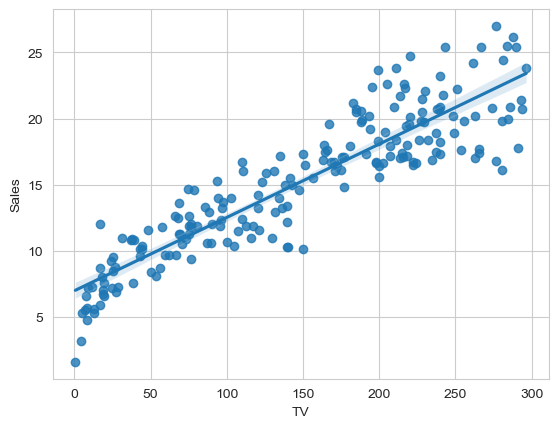

In [5]:
#ploting regression plot using seaborn
sns.regplot(x='TV', y='Sales', data=advertising)
plt.show()

<Figure size 500x1000 with 0 Axes>

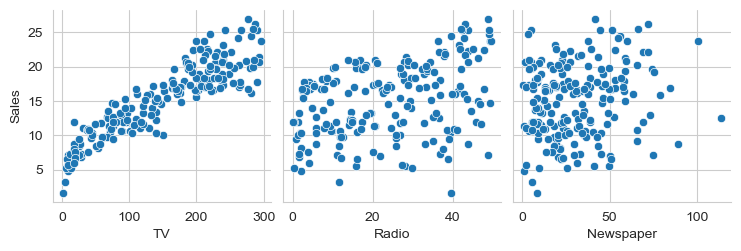

In [6]:
plt.figure(figsize=(5,10))
sns.pairplot(x_vars= ['TV', 'Radio','Newspaper'], y_vars= 'Sales', data= advertising)
plt.show()

In [7]:
#checking co rellation
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Figure size 1000x1000 with 0 Axes>

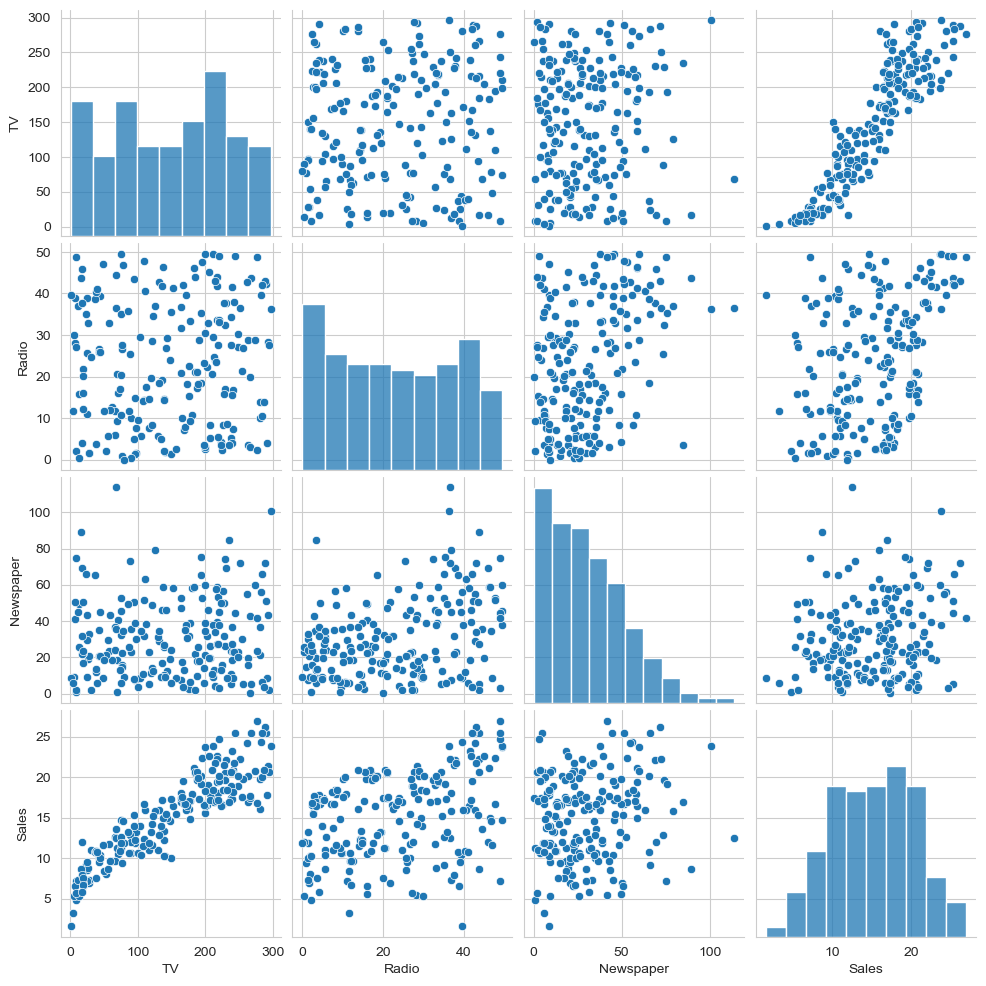

In [8]:
#comparing all the three variables againt 
plt.figure(figsize=(10,10))
sns.pairplot(data = advertising)
plt.show()

<AxesSubplot:>

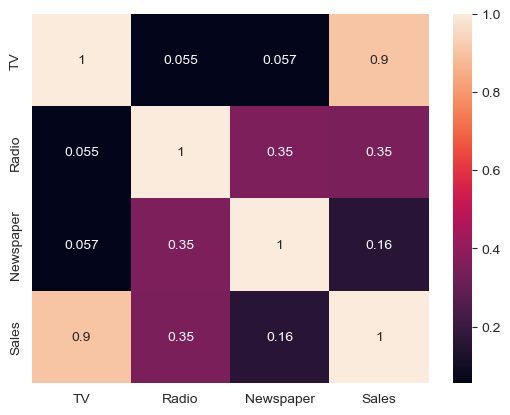

In [9]:
sns.heatmap(data=advertising.corr(), annot=True)

## Step 2: Training the data
### Steps:
1. create x and y
2. create train and test sets(70-30,80-20)
3. Train the model on the training set(i.e learn the coefficients)
4. Evaluate the model(train set, test set)

In [10]:
#create x and y
X = advertising['TV'] #predictor variable
y = advertising['Sales']

In [11]:
#train test split
X_train, X_test, y_train, y_test =train_test_split(X,y, train_size=.70, random_state=100)

In [12]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

#### Training the model

In [13]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [14]:
#y = c + m1 * x
#y = c.constant + m1 * TV

#### Fitting the model

In [15]:
#fitting the model
lr  = sm.OLS(y_train, X_train_sm)# linear regression object created
lr_model = lr.fit()
lr_model.params #retuns all teh coefficient values

const    6.948683
TV       0.054546
dtype: float64

In [16]:
#sales = 7.21 + 0.054 * TV
#coefficient of TV is possitive, means strong positive linear relation
# And coefficient value is the value of sales when zero spent on TV marketing

In [17]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        21:35:33   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#coef and p-value
# R-squatred is 81.6% which means the 81.6% of variance in beta has been 
#explained by the model
#p(F-statistic) si low => teh fit is not by chance

/Users/binayyadab/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


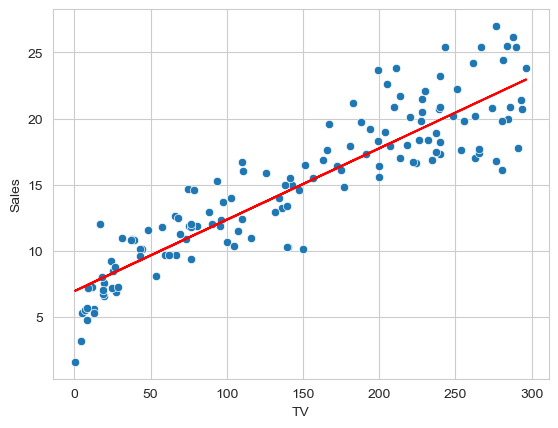

In [19]:
#ploting the model with the training data
sns.scatterplot(X_train, y_train)
plt.plot(X_train, 6.948+.054*X_train, 'r')
plt.show()

### Step3: Residual analysis

In [20]:
#error = (y_train-y_train_pred)

In [21]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

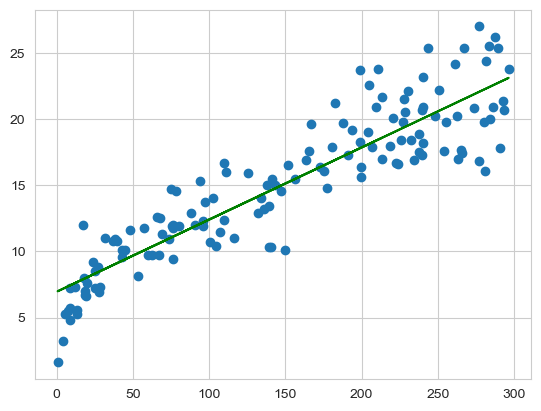

In [22]:
#ploting the predicted values of y_train_pred
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'g')
plt.show()

In [23]:
res = y_train-y_train_pred

/Users/binayyadab/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


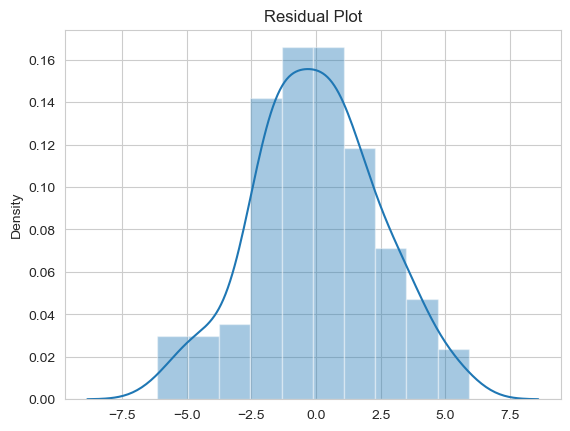

In [24]:
#ploting the residuals
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

In [25]:
#feom above we can colclud that the residual is followinfg a normal 
#distribution with mean 0

/Users/binayyadab/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


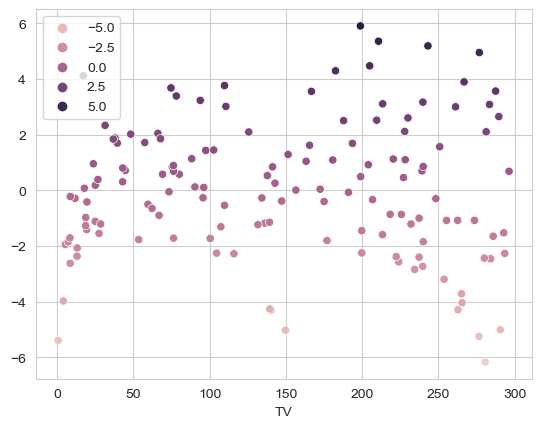

In [26]:
#look for the patternsin residuals(we should not be abkle to identify)
sns.scatterplot(X_train, res, hue=res)
plt.show()

In [27]:
#from above we can see that all the ponts are distributed arround mean 
#so we can not see any partern
#now we can sya that our data is fit for linear regression and we can procees further

### Step34: Prediction and evaluation on test set
1. Make prediction on the test set(y_test_pred)
2. Evaluate the model, r_squared, on the test

In [28]:
#add constant/ intercept to test set
x_test_sm = sm.add_constant(X_test)
#pred on test set
y_test_pred = lr_model.predict(x_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [29]:
#Evaluate the model, r_squared, on the test
#r_squared
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [30]:
print(y_test_pred.shape)
print(y_train.shape)

(60,)
(140,)


In [31]:
#r_squared on train
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [32]:
#mean squared error, used while comparing two models
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

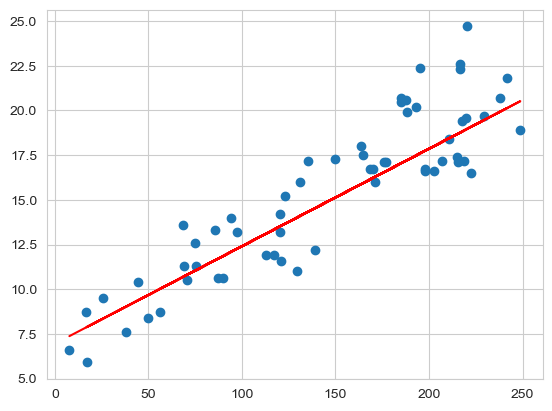

In [33]:
#viswalizing on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Model Comparison using RMSE
$Question.$<br/>
**You fit two linear regression models for the same data, where the first one gives an RMSE value of 3.78, and the second returns a value of 6.33. Which of these is a better model?**

$Ans:-$ 
- Yes! Recall that ``RMSE (Root Mean Squared Error)`` is a metric that tells you the deviation of the predicted values by a model from the actual observed values. So, since it is a sort of error term, it is better to have a low ``RMSE``.

- Notice that the ``RMSE`` for the first model is lesser than the second model. So naturally, this model would be better than the other.

# Linear Regression using ``SKLearn``
### Steps:
1. create an object of linear regression
2. fit the model learing of coefficient happen
3. See the params , make the prediction(train, test)
4. evaluate (r2, etc.)

In [34]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.70, random_state=100 )

In [38]:
#reshaping the X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
print(X_train_lm.shape)
X_test_lm = X_test.values.reshape(-1,1)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [39]:
#1. create an object of linear regression
lm = LinearRegression()
#2. fit the model learing of coefficient happen
lm.fit(X_train_lm, y_train)

LinearRegression()

In [40]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [41]:
#3. See the params , make the prediction(train, test)
print('slope: ',lm.coef_)
print('Intercept: ', lm.intercept_)

slope:  [0.05454575]
Intercept:  6.94868320000136


In [42]:
#make predctions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [49]:
#4. evaluate (r2, etc.)
print('r_square for training set: ', r2_score(y_true=y_train, y_pred=y_train_pred)*100)
print('r_square for test set: ', r2_score(y_true=y_test, y_pred=y_test_pred)*100)

r_square for training set:  81.57933136480388
r_square for test set:  79.2103160124566
